In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier               
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
ExcelTable = pd.ExcelFile('heart_disease.xlsx')
Context = pd.read_excel(ExcelTable, 'Description')
df = pd.read_excel(ExcelTable, 'Heart_disease')
df.head()

age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0

In [3]:
df.shape

(908, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
# we have missing values

In [6]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

### Summary Statistics

In [7]:
df.describe()

age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000

### Checking Duplicates

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

### Missing values

In [11]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [12]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean()) 

In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

### Encoding 

In [14]:
df['cp'].value_counts()

asymptomatic       495
non-anginal        202
atypical angina    165
typical angina      45
Name: cp, dtype: int64

In [15]:
df['sex'].value_counts()

Male      717
Female    190
Name: sex, dtype: int64

In [16]:
df['fbs'].value_counts()

False    722
True     185
Name: fbs, dtype: int64

In [17]:
df['restecg'].value_counts()

normal              542
lv hypertrophy      187
st-t abnormality    178
Name: restecg, dtype: int64

In [18]:
df['exang'].value_counts()

False    516
True     336
TURE      36
FALSE     19
Name: exang, dtype: int64

In [19]:
df['slope'].value_counts()

flat           453
upsloping      298
downsloping    156
Name: slope, dtype: int64

In [20]:
df['thal'].value_counts()

normal               385
reversable defect    346
fixed defect         176
Name: thal, dtype: int64

In [21]:
label_encoder = LabelEncoder()

In [22]:
# Apply Label Encoding to the 'sex' column
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])



In [23]:
# Retrieve the mapping for 'sex'
sex_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("\nMapping for 'sex':", sex_mapping)


Mapping for 'sex': {'Female': 0, 'Male': 1}


In [24]:
# Inverse transform to get original categories
#original_sex = label_encoder.inverse_transform(df['sex_encoded'])
#print("Original 'sex' values:", original_sex)

In [25]:
# Apply Label Encoding to the 'cp' column
df['cp_encoded'] = label_encoder.fit_transform(df['cp'])

In [26]:
# Retrieve the mapping for 'cp'
cp_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Mapping for 'cp':", cp_mapping)

Mapping for 'cp': {'asymptomatic': 0, 'atypical angina': 1, 'non-anginal': 2, 'typical angina': 3}


In [27]:
# Apply Label Encoding to the 'fbs' column
df['fbs_encoded'] = label_encoder.fit_transform(df['fbs'])


In [28]:
# Retrieve the mapping for 'fbs'
fbs_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Mapping for 'fbs':", fbs_mapping)

Mapping for 'fbs': {False: 0, True: 1}


In [29]:
# Apply Label Encoding to the 'restecg' column
df['restecg_encoded'] = label_encoder.fit_transform(df['restecg'])


In [30]:
# Retrieve the mapping for 'restecg'
restecg_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Mapping for 'restecg':", restecg_mapping)

Mapping for 'restecg': {'lv hypertrophy': 0, 'normal': 1, 'st-t abnormality': 2}


In [31]:
# Apply One-Hot Encoding to the 'exang' column
#df_encoded = pd.get_dummies(df, columns=['exang'])
#df_encoded

In [32]:
# Apply Label Encoding to the 'slope' column
df['slope_encoded'] = label_encoder.fit_transform(df['slope'])

In [33]:
# Retrieve the mapping for 'slope'
slope_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Mapping for 'slope':", slope_mapping)

Mapping for 'slope': {'downsloping': 0, 'flat': 1, 'upsloping': 2}


In [34]:
# Apply Label Encoding to the 'thal' column
df['thal_encoded'] = label_encoder.fit_transform(df['thal'])

In [35]:
# Retrieve the mapping for 'thal'
thal_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Mapping for 'thal':", thal_mapping)

Mapping for 'thal': {'fixed defect': 0, 'normal': 1, 'reversable defect': 2}


## # Clean the 'exang' column

In [36]:
df['exang'].value_counts()

False    516
True     336
TURE      36
FALSE     19
Name: exang, dtype: int64

In [37]:

# Replace string representations with boolean values
df['exang'] = df['exang'].replace({'TRUE': True, 'FALSE': False, 'TURE': True})

In [38]:
# Convert the column to boolean type
df['exang'] = df['exang'].astype(bool)


In [39]:
df['exang'].value_counts()

False    535
True     372
Name: exang, dtype: int64

In [40]:
# Apply Label Encoding to the 'exang' column
df['exang_encoded'] = label_encoder.fit_transform(df['exang'])

In [41]:
# Retrieve the mapping for 'exang'
exang_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Mapping for 'exang':", exang_mapping)

Mapping for 'exang': {False: 0, True: 1}


### Dropping columns which are encoded

In [42]:
columns_to_drop = ['sex','cp', 'fbs','thal','restecg','slope','exang']  # Specify the columns you want to drop
df = df.drop(columns=columns_to_drop)

In [43]:
df.head()

age  trestbps  chol  thalch  oldpeak  num  sex_encoded  cp_encoded  \
0   63       145   233     150      2.3    0            1           3   
1   41       135   203     132      0.0    0            1           1   
2   57       140   192     148      0.4    0            1           0   
3   52       118   186     190      0.0    0            1           3   
4   57       110   201     126      1.5    0            1           0   

   fbs_encoded  restecg_encoded  slope_encoded  thal_encoded  exang_encoded  
0            1                0              0             0              0  
1            0                1              1             0              0  
2            0                1              1             0              0  
3            0                0              1             0              0  
4            0                1              1             0              1

### Histogram


<Figure size 1500x1000 with 0 Axes>

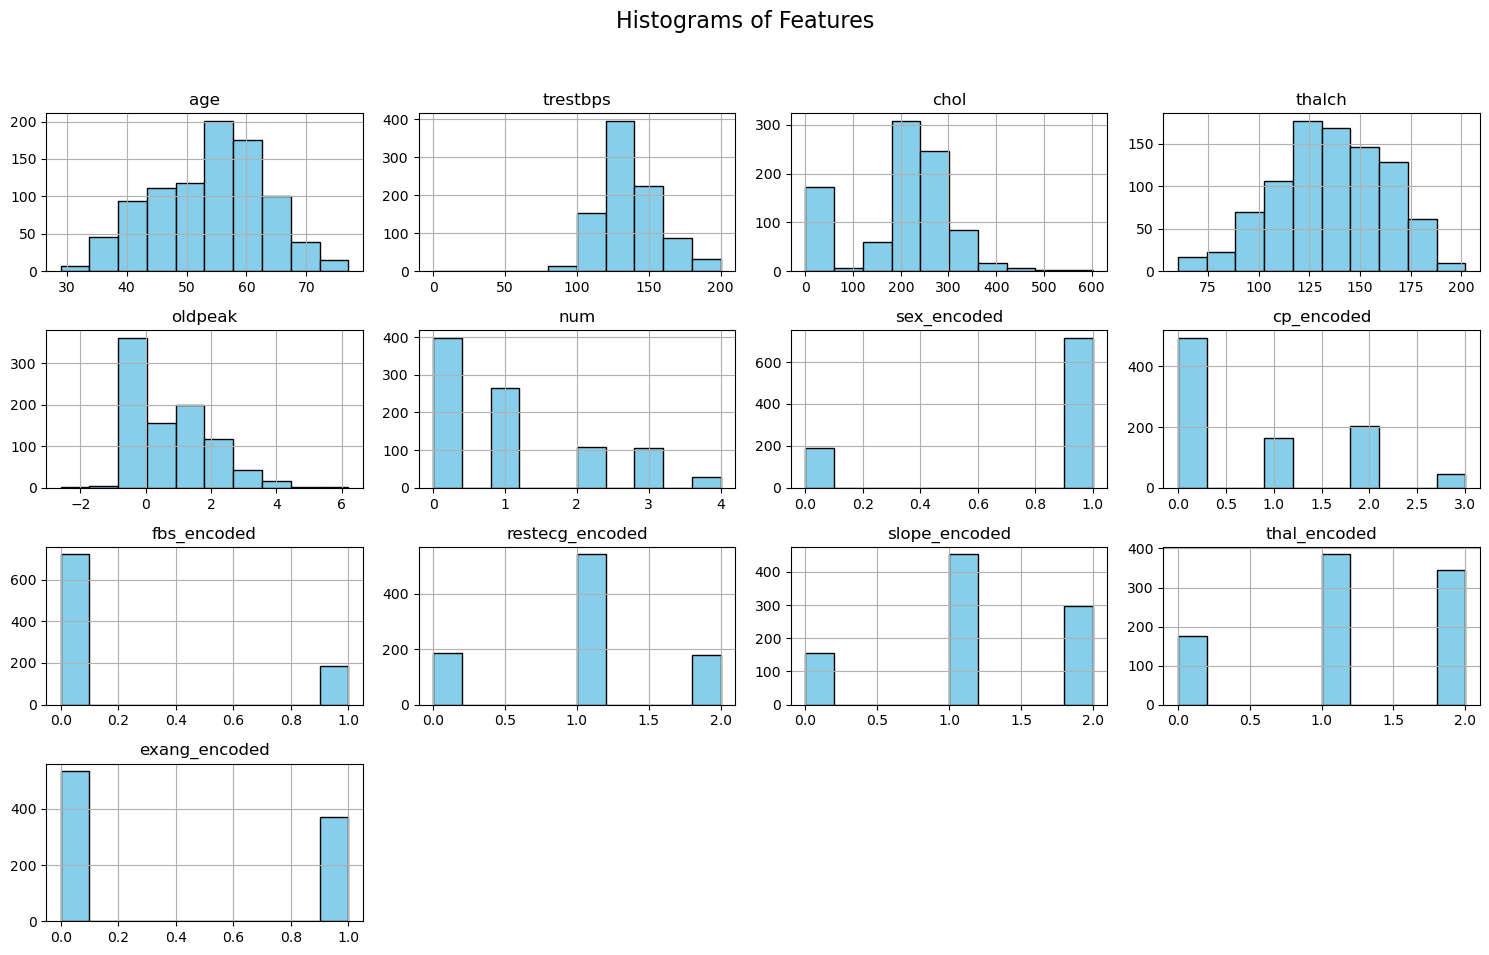

In [44]:
# 1. Histograms
num_features = len(df.columns)  # Get the number of features
num_rows = (num_features // 4) + (num_features % 4 > 0)  # Calculate number of rows needed

plt.figure(figsize=(15, 10))
df.hist(bins=10, figsize=(15, 10), layout=(num_rows, 4), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Key findings

#### thalch column is normally distributed.

#### chol column can have a few outliers but we are going to keep it because cholestrol can sometimes be as high as 600 mg/dL.

#### trestbps is slighlt negatively skewed.

In [45]:
# Set the style of seaborn
sns.set(style="whitegrid")

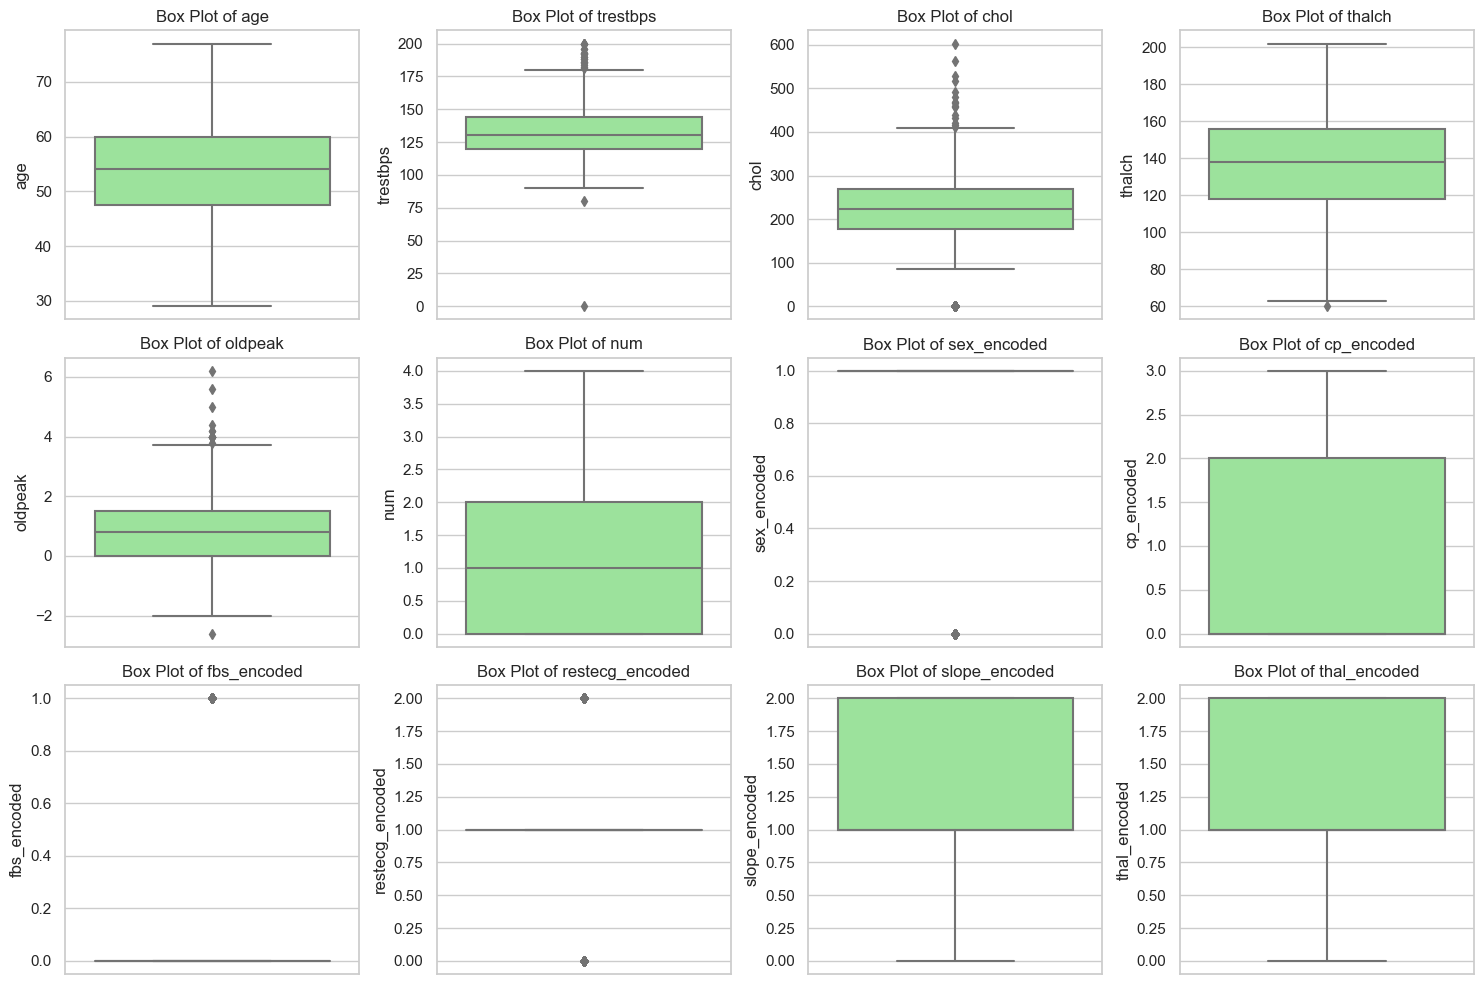

In [46]:
# 2. Box Plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):  # Exclude 'num' for box plots
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[column], color='lightgreen')
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

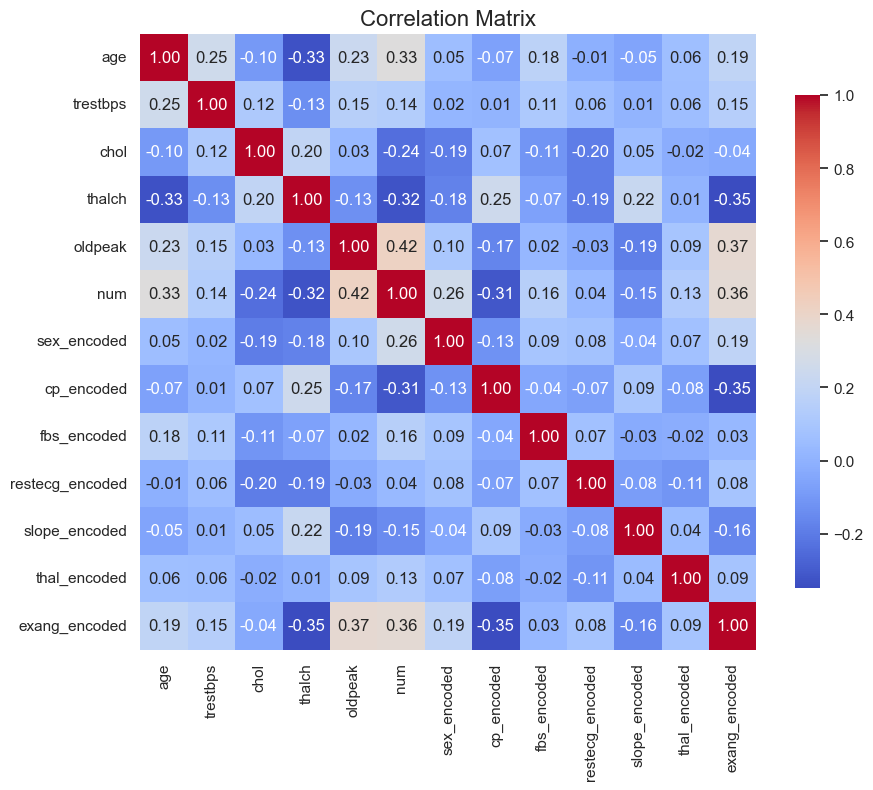

In [47]:
# 3. Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix', fontsize=16)
plt.show()

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


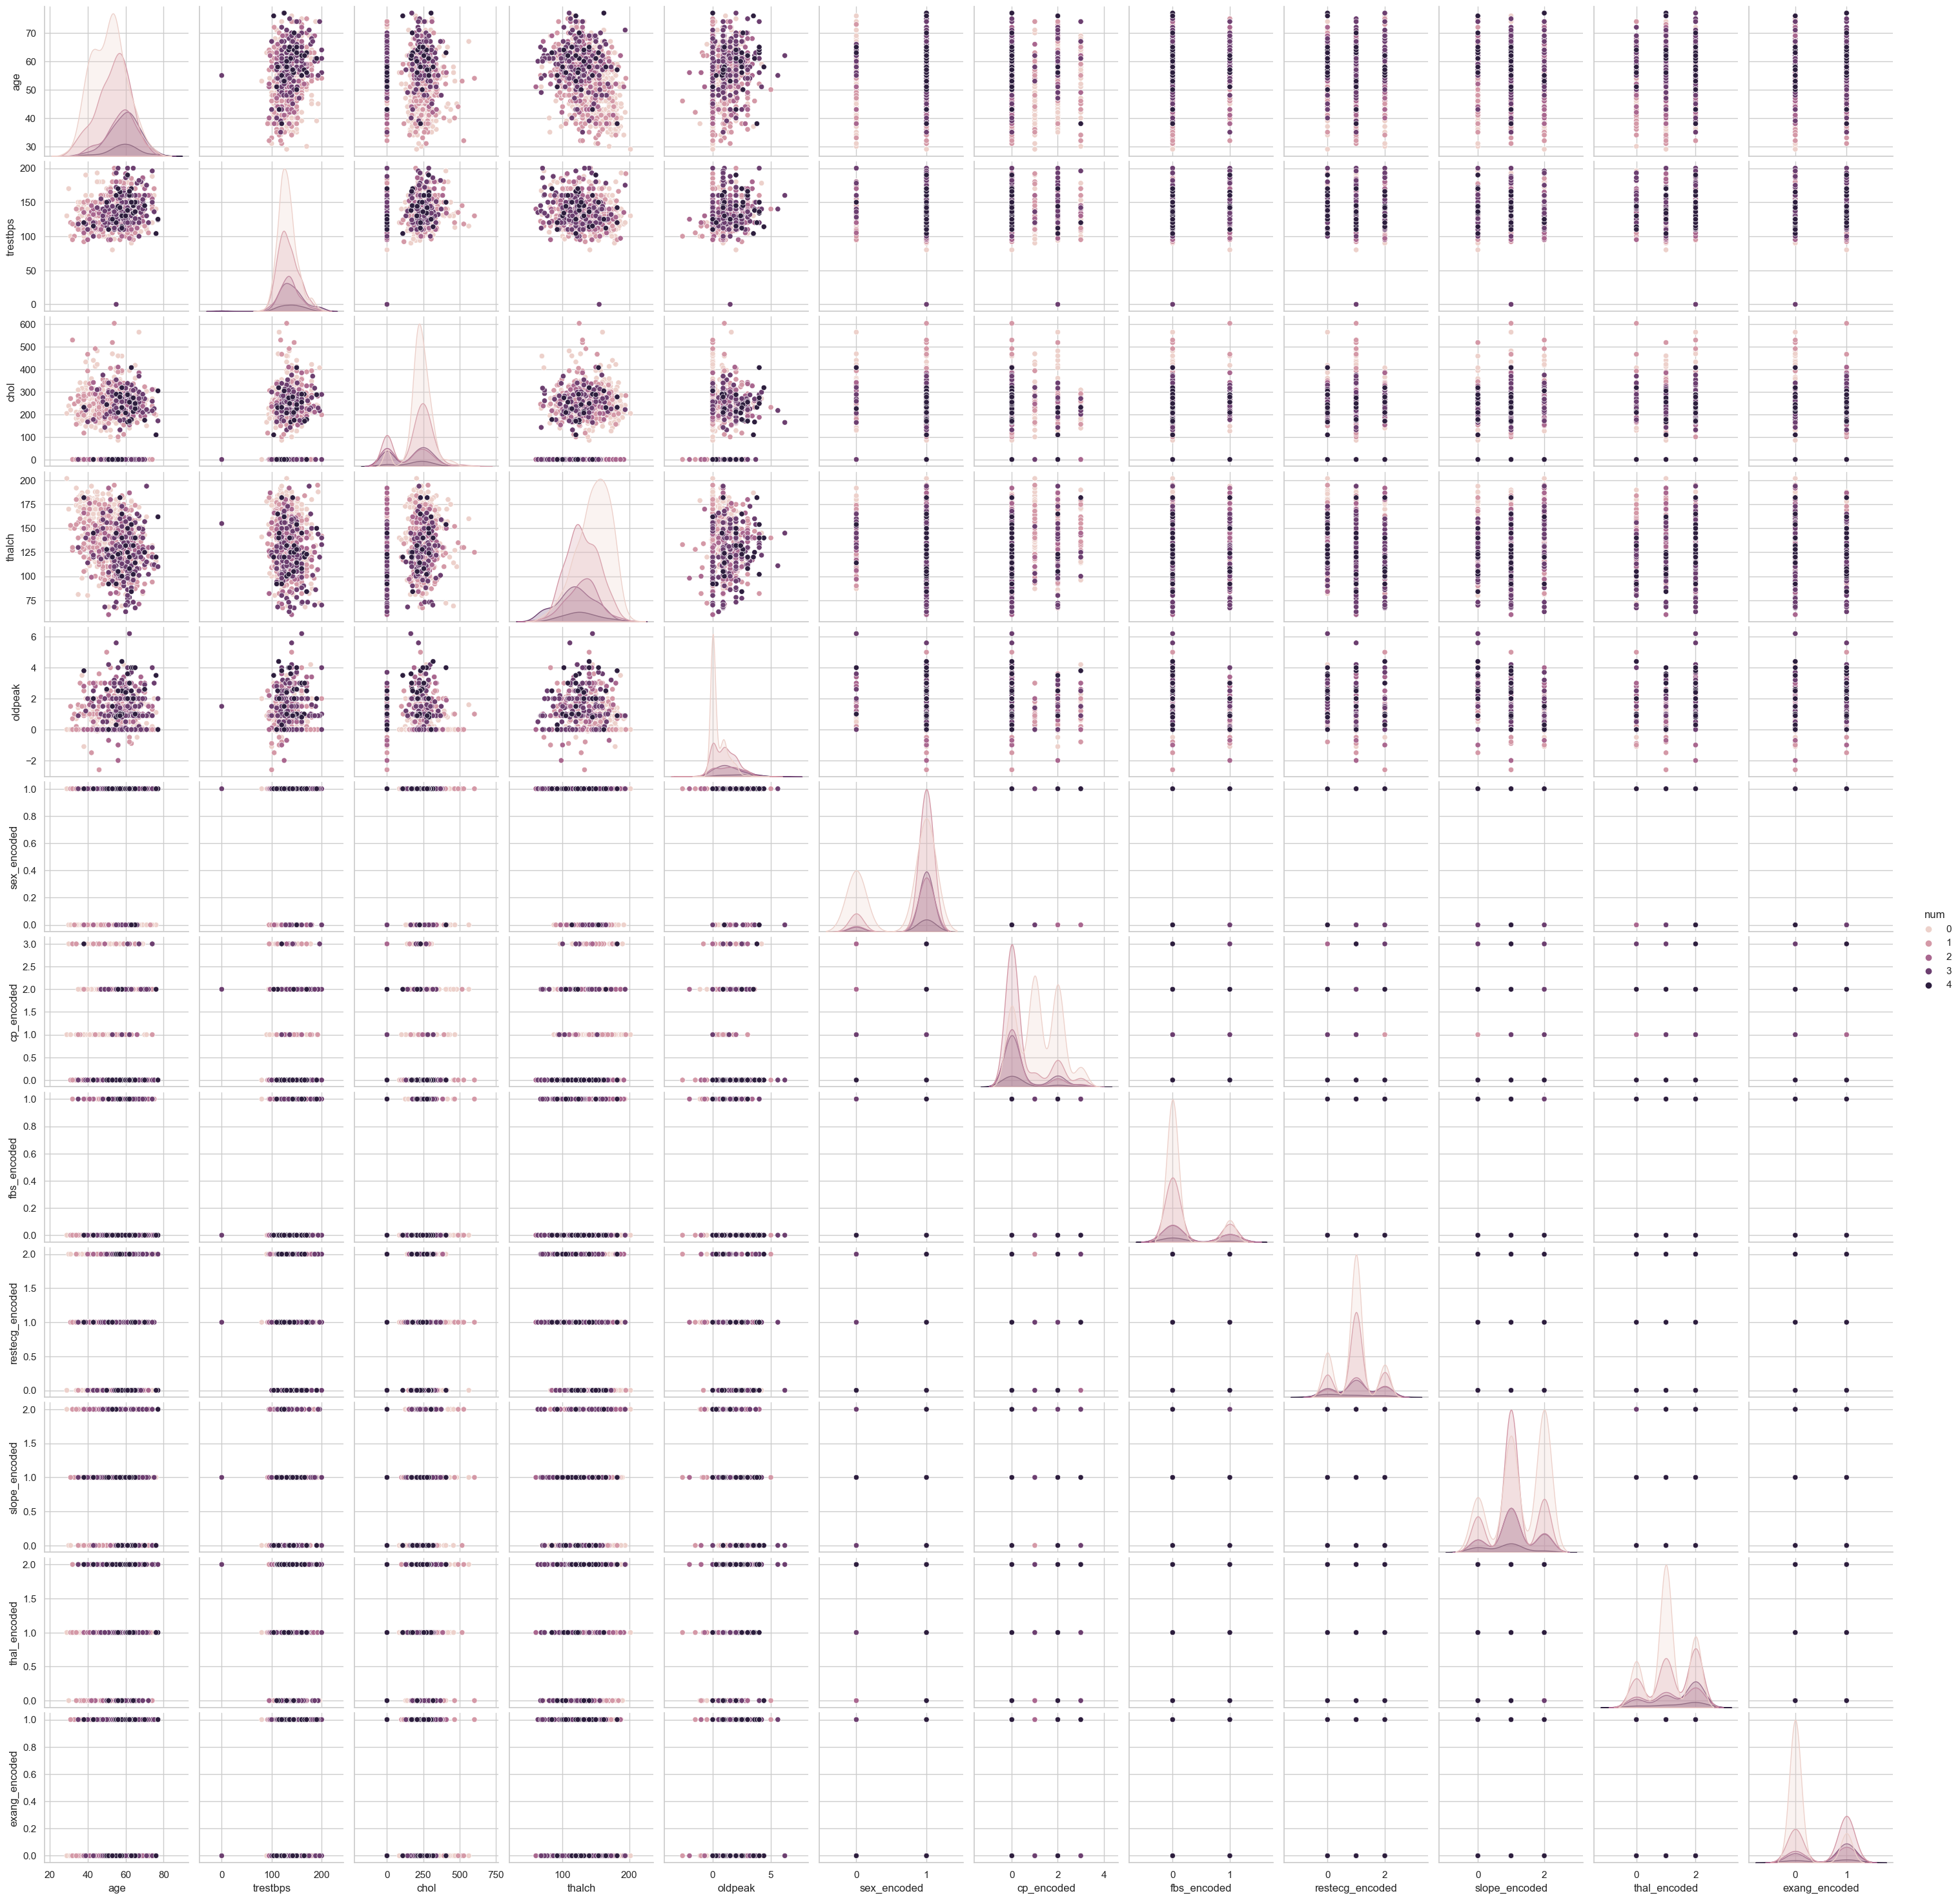

In [48]:
sns.pairplot(df, hue = 'num')

### IQR

In [49]:
# Calculate the IQR
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1

In [50]:
# Define the upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [51]:
# Remove outliers
df = df[df['chol'] >= lower_bound]
df = df[df['chol'] <= upper_bound]


In [52]:
# Capping the outliers
df['chol'] = np.where(df['chol'] < lower_bound, lower_bound, 
                                np.where(df['chol'] > upper_bound, upper_bound, df['chol']))

### Remove outlier from trestbps columns

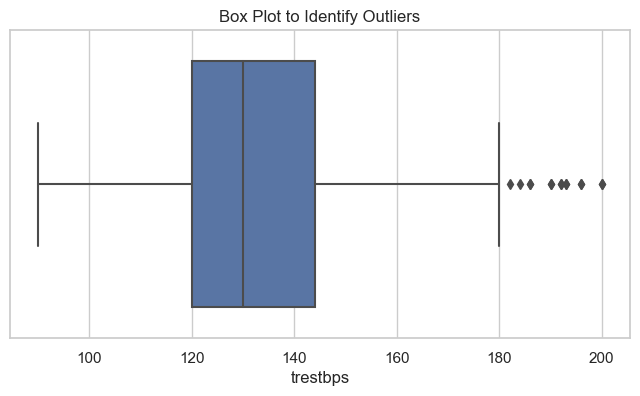

In [53]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['trestbps'])
plt.title('Box Plot to Identify Outliers')
plt.show()

In [54]:
# Calculate the IQR
#Q1_tres = df['trestbps'].quantile(0.25)
#Q3_tres = df['trestbps'].quantile(0.75)
#IQR_tres = Q3_tres - Q1_tres

In [55]:
# Define the upper and lower bounds
#upper_bound_tres = Q3_tres + 1.5 * IQR_tres
#lower_bound_tres = Q1_tres - 1.5 * IQR_tres

In [56]:
# Remove outliers
#df = df[df['trestbps'] >= lower_bound_tres]
#df = df[df['trestbps'] <= upper_bound_tres]

## Decision Tree Classification

### Split the dataset into training and testing sets

In [57]:
# Define the target variable (Y)
Y = df['num']
Y

0      0
1      0
2      0
3      0
4      0
      ..
900    4
902    4
904    4
906    4
907    4
Name: num, Length: 720, dtype: int64

In [58]:
# Define the features (X) by dropping the target column
X = df.drop(columns=['num'])
X

age  trestbps   chol  thalch   oldpeak  sex_encoded  cp_encoded  \
0     63       145  233.0     150  2.300000            1           3   
1     41       135  203.0     132  0.000000            1           1   
2     57       140  192.0     148  0.400000            1           0   
3     52       118  186.0     190  0.000000            1           3   
4     57       110  201.0     126  1.500000            1           0   
..   ...       ...    ...     ...       ...          ...         ...   
900   61       190  287.0     150  2.000000            1           0   
902   62       160  254.0     108  3.000000            1           0   
904   62       166  170.0     120  3.000000            1           0   
906   56       144  208.0     105  0.892308            1           2   
907   57       142  277.0     182  0.892308            1           0   

     fbs_encoded  restecg_encoded  slope_encoded  thal_encoded  exang_encoded  
0              1                0              0             0              0  
1              0                1              1             0              0  
2              0                1              1             0              0  
3              0                0              1             0              0  
4              0                1              1             0              1  
..           ...              ...            ...           ...            ...  
900            1                0              0             2              1  
902            1                2              1             1              1  
904            0                2              1             2              1  
906            1                2              0             0              1  
907            1                2              1             2              0  

[720 rows x 12 columns]

In [59]:
x_train, x_test , y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [60]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)     #data is splited in traing and testing dataset

(576, 12) (576,) (144, 12) (144,)


## feature scaling

In [61]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [62]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5,random_state=48,min_samples_split=15)         #criterion = 'gini'  # max depth means 'Level'
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=15,
                       random_state=48)

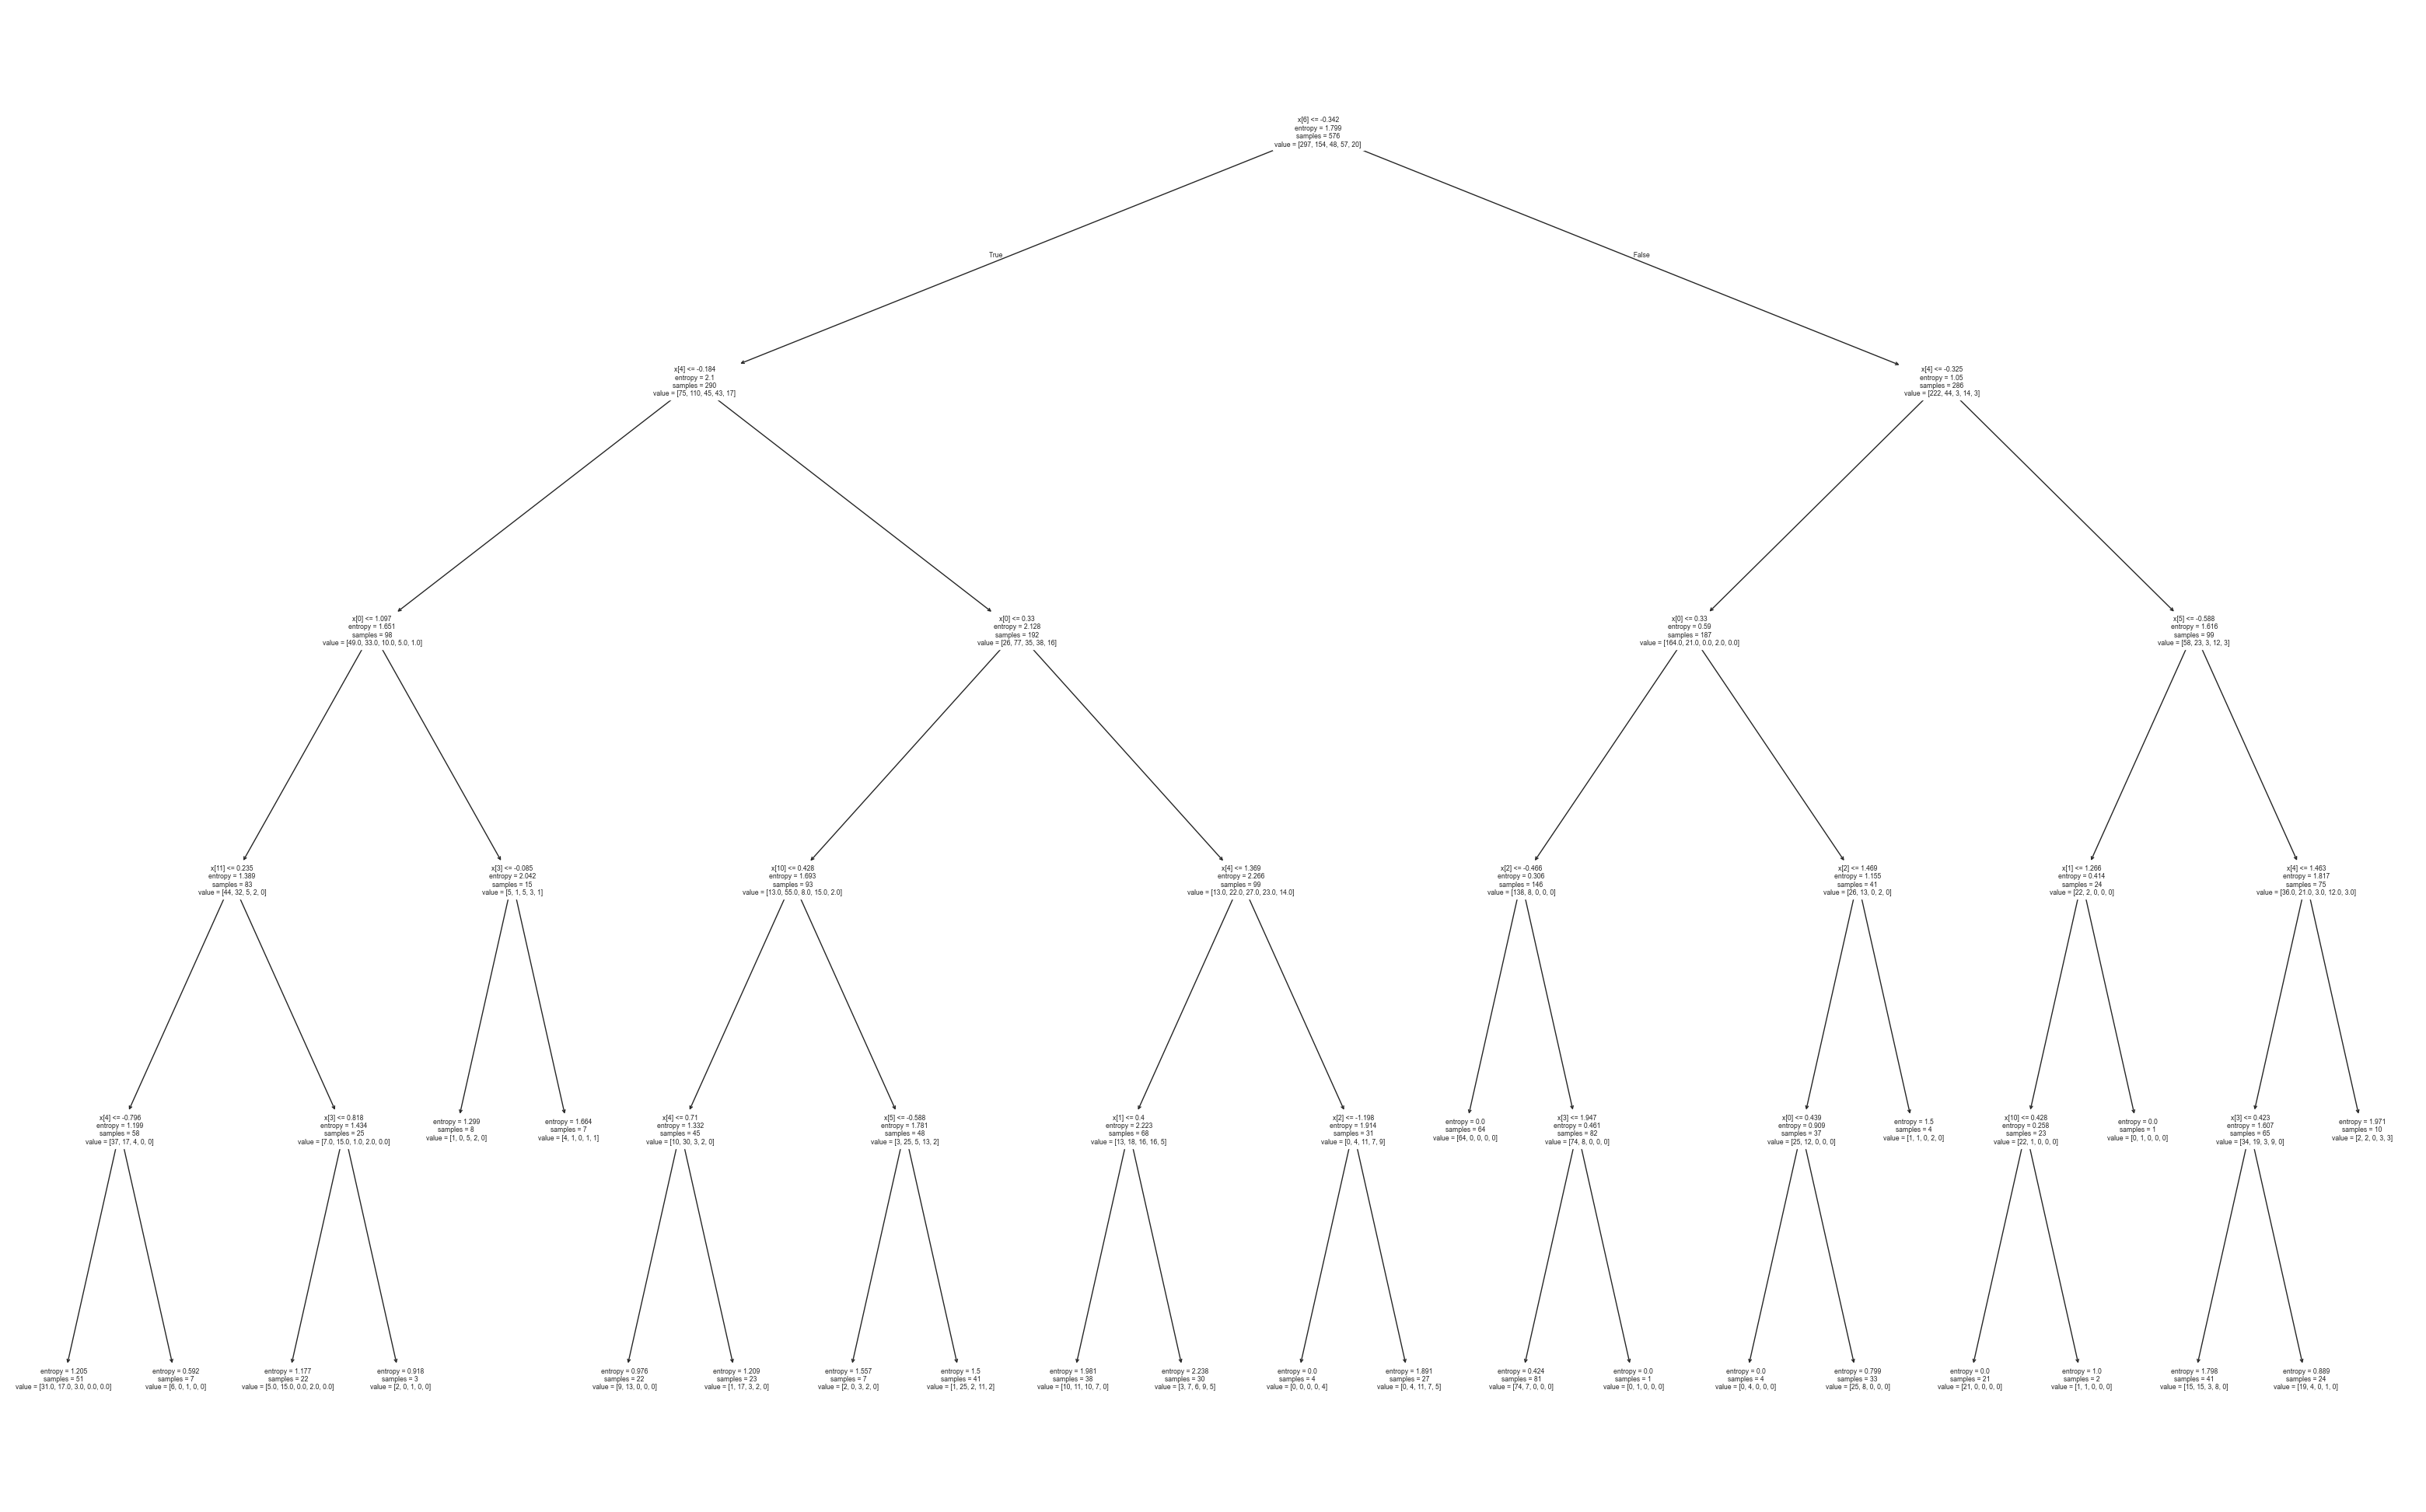

In [63]:
#PLot the decision tree
plt.figure(figsize=(40, 25))
plot_tree(model)
plt.show()

[Text(0.5436046511627907, 0.9166666666666666, 'cp_encoded <= -0.342\nentropy = 1.799\nsamples = 576\nvalue = [297, 154, 48, 57, 20]\nclass = 0'),
 Text(0.28488372093023256, 0.75, 'oldpeak <= -0.184\nentropy = 2.1\nsamples = 290\nvalue = [75, 110, 45, 43, 17]\nclass = 1'),
 Text(0.4142441860465116, 0.8333333333333333, 'True  '),
 Text(0.1511627906976744, 0.5833333333333334, 'age <= 1.097\nentropy = 1.651\nsamples = 98\nvalue = [49.0, 33.0, 10.0, 5.0, 1.0]\nclass = 0'),
 Text(0.09302325581395349, 0.4166666666666667, 'exang_encoded <= 0.235\nentropy = 1.389\nsamples = 83\nvalue = [44, 32, 5, 2, 0]\nclass = 0'),
 Text(0.046511627906976744, 0.25, 'oldpeak <= -0.796\nentropy = 1.199\nsamples = 58\nvalue = [37, 17, 4, 0, 0]\nclass = 0'),
 Text(0.023255813953488372, 0.08333333333333333, 'entropy = 1.205\nsamples = 51\nvalue = [31.0, 17.0, 3.0, 0.0, 0.0]\nclass = 0'),
 Text(0.06976744186046512, 0.08333333333333333, 'entropy = 0.592\nsamples = 7\nvalue = [6, 0, 1, 0, 0]\nclass = 0'),
 Text(0.139

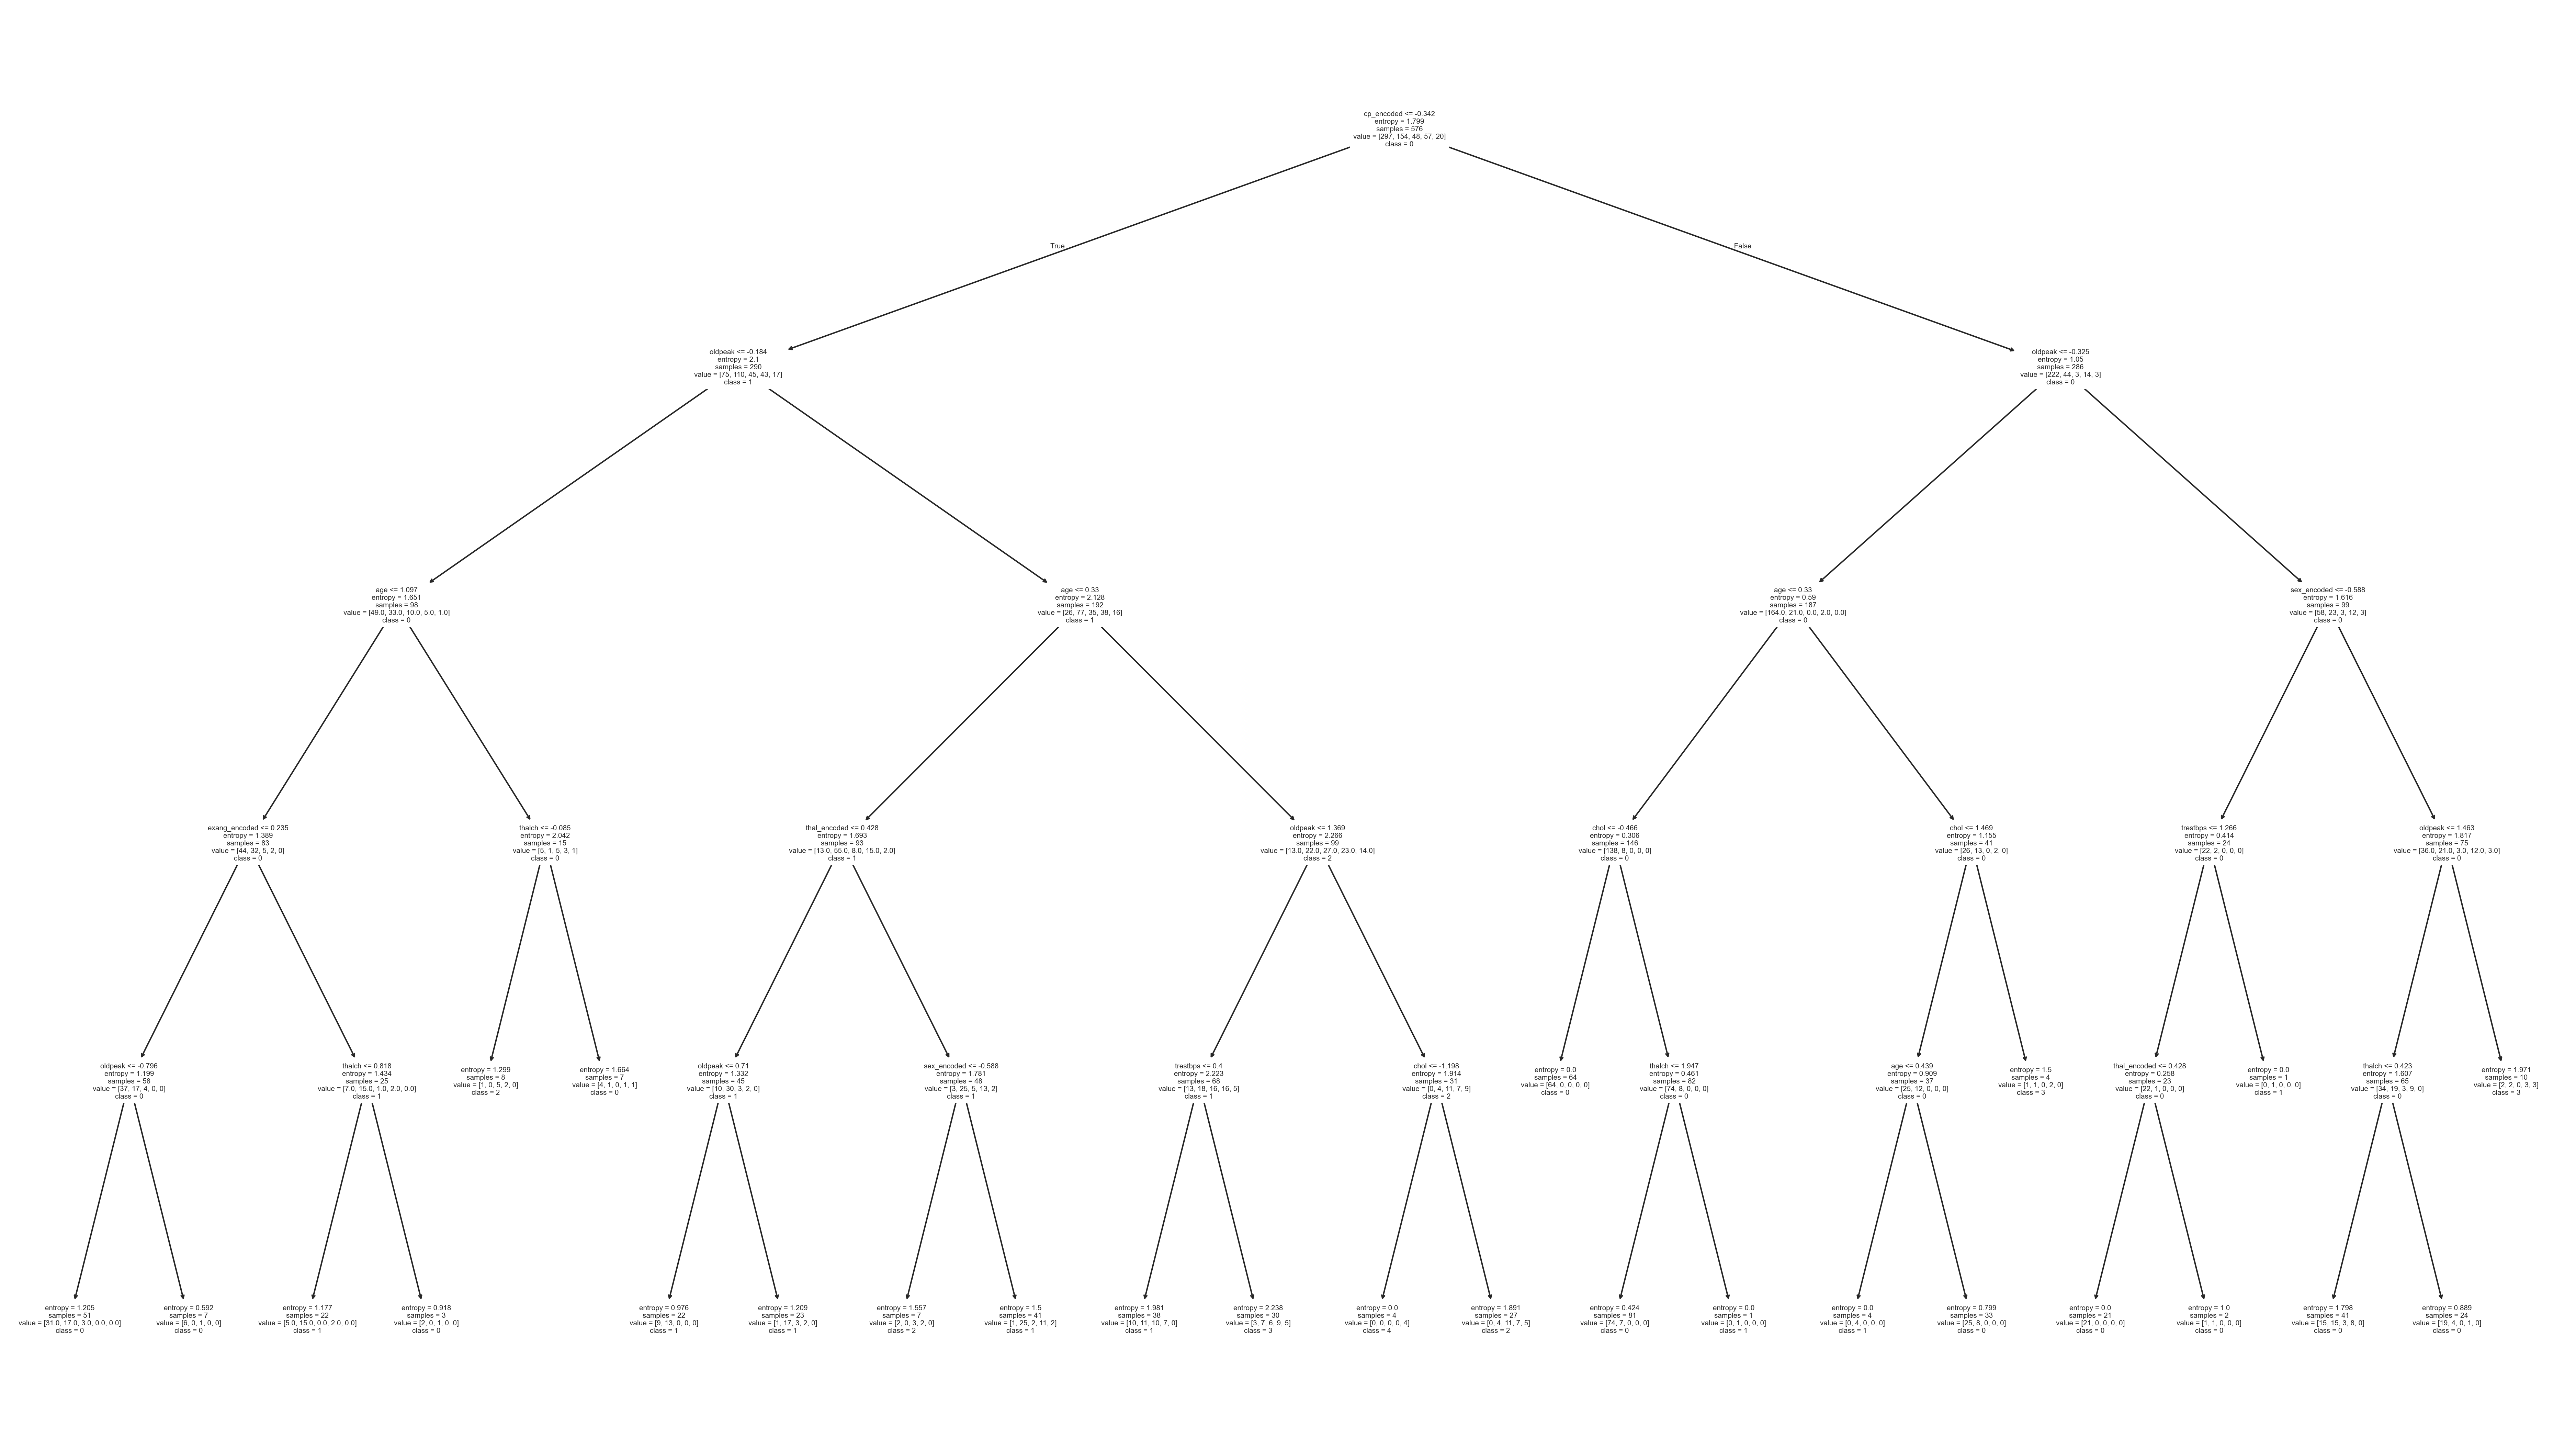

In [64]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (32,18), dpi=300)

plot_tree(model, feature_names=X.columns, class_names=['0', '1','2','3','4'], filled=False)

We can see that out parent node is cp_encoded column its because it was purest of all other columns 
Further get divided by AGE and SEX column 

Looks like cp_encoded was an important feature in predicting its Heart-attack or Not Heart-attack or Different stages

In [65]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
preds

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 1, 4, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 1,
       3, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 3, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 2,
       1, 1, 0, 0, 1, 0, 4, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 3, 1,
       0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 3, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [66]:
pd.Series(preds).value_counts()

0    82
1    47
3     7
2     6
4     2
dtype: int64

In [67]:
# Accuracy 
np.mean(preds==y_test) 



0.625

In [68]:
# Calculate accuracy
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.62


In [69]:
# Generate classification report
report = classification_report(y_test, preds)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        72
           1       0.57      0.61      0.59        44
           2       0.17      0.07      0.10        14
           3       0.29      0.17      0.21        12
           4       0.00      0.00      0.00         2

    accuracy                           0.62       144
   macro avg       0.35      0.34      0.34       144
weighted avg       0.58      0.62      0.60       144



### target [0 = no heart disease ;  1,2,3,4 = stages of heart disease ]

#### key findings from Classification Report

Class 0 has the highest precision and recall among all classes, indicating that the model performs well in identifying this class. The F1-score of 0.78 suggests a good balance between precision and recall.

Class 1 shows moderate performance, with a precision of 0.57 and recall of 0.61. The F1-score of 0.59 indicates that there is room for improvement, particularly in precision.

Class 2 has very low precision and recall, indicating that the model struggles significantly to identify this class. The F1-score of 0.10 suggests that this class is poorly represented in the model's predictions.

Class 3 also shows poor performance, with low precision and recall. The F1-score of 0.21 indicates that the model is not effectively identifying this class.

Class 4 is not predicted correctly at all, as indicated by the precision, recall, and F1-score of 0. This suggests that the model fails to recognize this class, likely due to its very low support (only 2 instances).

In [70]:
df['num'].value_counts()


0    369
1    198
3     69
2     62
4     22
Name: num, dtype: int64

Since the dataset is imbalanced itself our model is failing to perform well with the help of techniques like
oversampling the minority classes, undersampling the majority classes, or using synthetic data generation methods like SMOTE
after using these techniques our model performance can increase in such multiclass classification problems

 The contribution of 4th class is itself very low so our model is failing in indentify it

### Building Decision Tree Classifier (CART) using Gini Criteria

In [71]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4,random_state=77)

In [72]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=77)

In [73]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.625

In Hyperparameter tuning i have removed outlier from chol column which helped me increase my Accuracy from 52% to 62% 

I have experimented with different max_depth values like 3,4,5,6,7,8, the best results I get are at 3,4,5 . I also experimented
with min_samples_split.


